# Linear Regression with Python Scikit Learn

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

**Reading the data**

In [3]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
print(data.shape)

(25, 2)


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Plotting Histogram

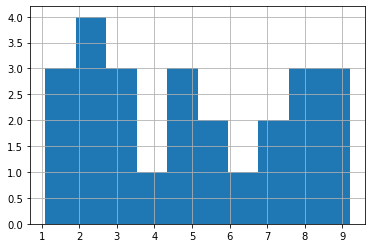

In [7]:
data['Hours'].hist()
plt.show()

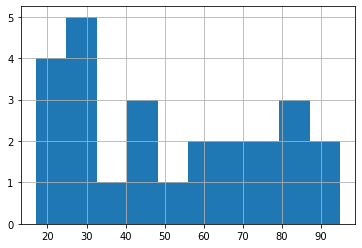

In [8]:
data['Scores'].hist()
plt.show()

### Plotting HeatMap

<AxesSubplot:>

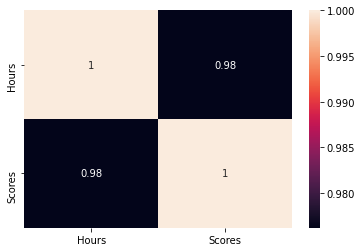

In [9]:
sns.heatmap(data.corr(), annot=True)

**It shows that both columns are highly correlated**

### Detecting Outliers

Text(0, 0.5, 'Percentage Scored')

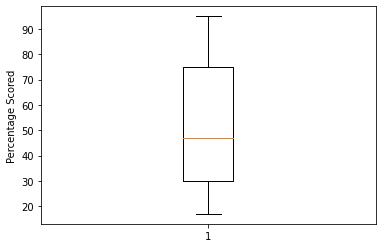

In [10]:
plt.boxplot(data['Scores'])
plt.ylabel('Percentage Scored')

**We can see from above boxplots that there are no outliers in the data**

### Plotting the distribution of scores

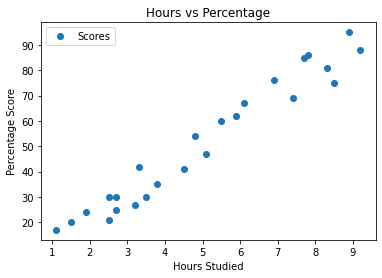

In [12]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**We can see that there is a linear relation between Percentage Score and Hours Studied**

### Preparing the data

**The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).**

In [13]:
X = data.iloc[:,:-1].values
y = data.iloc[:, 1].values

**Splitting the data into training and test sets using inbuilt Scikit-Learn's built-in train_test_split() method.**

In [14]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

### Training Algorithm

In [15]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()

#fitting the model
regressor.fit(X_train, y_train) 

LinearRegression()

In [16]:
regressor.coef_

array([9.91065648])

In [17]:
regressor.intercept_

2.018160041434662

**Plotting the Regression Line**

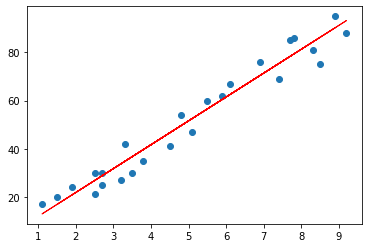

In [18]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X,line,color='red', linewidth=1)
plt.show()


### Making Predictions

In [19]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [20]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [21]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('MSE: {}'.format(np.sqrt( mean_squared_error(y_test, y_pred))))
print("MAE: {}".format(mean_absolute_error(y_test, y_pred)))
print("R squared: {}".format(r2_score(y_test, y_pred)))

MSE: 4.647447612100373
MAE: 4.183859899002982
R squared: 0.9454906892105354


## PREDICTED SCORE IF A STUDENT STUDY FOR 9.25 HRS IN A DAY

In [22]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539
